In [ ]:
#Part 1

In [ ]:
!pip install --upgrade google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import glob

In [ ]:
folder_path = '/content/Dane'

In [ ]:
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

In [ ]:
dataframes = [pd.read_csv(file) for file in all_files]

In [ ]:
combined_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
combined_df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Mon Jul 05 07:58:09 +0000 2021,NaN,NaN,NaN,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,4366,5053,9,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False
1,NaN,Mon Jul 05 08:21:28 +0000 2021,NaN,NaN,NaN,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,37596,1480,182,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False
2,NaN,Mon Jul 05 12:50:04 +0000 2021,NaN,NaN,NaN,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,1147,1861,9,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False
3,NaN,Mon Jul 05 06:33:46 +0000 2021,opad Polska pogoda klimat,https://twitter.com/PogodaMeteo/status/1411936...,NaN,5,1411936323779371013,NaN,NaN,NaN,...,6798,364,49,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False
4,NaN,Mon Jul 05 11:13:20 +0000 2021,NaN,NaN,NaN,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,1476,936,20,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False


In [ ]:
combined_df['created_at'].head()

,created_at
0,Mon Jul 05 07:58:09 +0000 2021
1,Mon Jul 05 08:21:28 +0000 2021
2,Mon Jul 05 12:50:04 +0000 2021
3,Mon Jul 05 06:33:46 +0000 2021
4,Mon Jul 05 11:13:20 +0000 2021


In [ ]:
weekday_mapping = {
    "Mon": "Monday",
    "Tue": "Tuesday",
    "Wed": "Wednesday",
    "Thu": "Thursday",
    "Fri": "Friday",
    "Sat": "Saturday",
    "Sun": "Sunday"
}
combined_df['created_at'] = combined_df['created_at'].replace(weekday_mapping, regex=True)

In [ ]:
combined_df['created_at'].head()

,created_at
0,Monday Jul 05 07:58:09 +0000 2021
1,Monday Jul 05 08:21:28 +0000 2021
2,Monday Jul 05 12:50:04 +0000 2021
3,Monday Jul 05 06:33:46 +0000 2021
4,Monday Jul 05 11:13:20 +0000 2021


In [ ]:
month_mapping = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}
combined_df['user_created_at'] = combined_df['user_created_at'].replace(month_mapping, regex=True)

In [ ]:
combined_df['user_created_at'].head()

,user_created_at
0,Mon 02 08 16:44:23 +0000 2021
1,Wed 07 16 13:54:38 +0000 2014
2,Thu 05 07 21:18:59 +0000 2015
3,Thu 07 27 06:30:20 +0000 2017
4,Mon 03 02 13:22:28 +0000 2015


In [ ]:
combined_df['urls'].head()

,urls
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
all_links = combined_df['urls'].dropna().tolist()

In [ ]:
combined_df['extracted_links'] = combined_df['urls']

In [ ]:
print(all_links[:5])
combined_df.head()

['https://blog.squaber.com/2021/07/niewidzialna-reka-hossy-magazyn-bilans-lipiec-2021/', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://www.teraz-srodowisko.pl/aktualnosci/holandia-elektrownie-weglowe-10552.html', 'http://www.portalmorski.pl/inne/48771-przelewanie-sie-fal-przez-nabrzeza-bedzie-coraz-czestsze-rowniez-w-polsce']


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,extracted_links
0,NaN,Monday Jul 05 07:58:09 +0000 2021,NaN,NaN,NaN,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,5053,9,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False,NaN
1,NaN,Monday Jul 05 08:21:28 +0000 2021,NaN,NaN,NaN,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,1480,182,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False,NaN
2,NaN,Monday Jul 05 12:50:04 +0000 2021,NaN,NaN,NaN,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,1861,9,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False,NaN
3,NaN,Monday Jul 05 06:33:46 +0000 2021,opad Polska pogoda klimat,https://twitter.com/PogodaMeteo/status/1411936...,NaN,5,1411936323779371013,NaN,NaN,NaN,...,364,49,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False,NaN
4,NaN,Monday Jul 05 11:13:20 +0000 2021,NaN,NaN,NaN,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,936,20,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False,NaN


In [ ]:
combined_df['media'].head()

,media
0,NaN
1,NaN
2,NaN
3,https://twitter.com/PogodaMeteo/status/1411936...
4,NaN


In [ ]:
all_image_links = combined_df['media'].dropna().tolist()

In [ ]:
combined_df['extracted_images'] = combined_df['media']

In [ ]:
print(all_image_links[:5])
combined_df.head()

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1']


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,extracted_links,extracted_images
0,NaN,Monday Jul 05 07:58:09 +0000 2021,NaN,NaN,NaN,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,9,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False,NaN,NaN
1,NaN,Monday Jul 05 08:21:28 +0000 2021,NaN,NaN,NaN,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,182,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False,NaN,NaN
2,NaN,Monday Jul 05 12:50:04 +0000 2021,NaN,NaN,NaN,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,9,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False,NaN,NaN
3,NaN,Monday Jul 05 06:33:46 +0000 2021,opad Polska pogoda klimat,https://twitter.com/PogodaMeteo/status/1411936...,NaN,5,1411936323779371013,NaN,NaN,NaN,...,49,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False,NaN,https://twitter.com/PogodaMeteo/status/1411936...
4,NaN,Monday Jul 05 11:13:20 +0000 2021,NaN,NaN,NaN,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,20,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False,NaN,NaN


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        cleaned_text = ' '.join(word for word in words if word.lower() not in stop_words)
        return cleaned_text
    return text
combined_df['text_without_stopwords'] = combined_df['text'].apply(remove_stopwords)

In [ ]:
combined_df[['text', 'text_without_stopwords']].head()

,text,text_without_stopwords
0,@ciahol @Robert06270082 @Renata_Grochal @MacBo...,@ciahol @Robert06270082 @Renata_Grochal @MacBo...
1,@RyszardWojcik @Roberte36015396 @SzczesniakA @...,@RyszardWojcik @Roberte36015396 @SzczesniakA @...
2,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...
3,AutoTweet: Dobowa suma #opad w #Polska w dniu ...,AutoTweet: Dobowa suma #opad w #Polska w dniu ...
4,@Energetyka_24 Człowiek ma gigantyczny wpływ n...,@Energetyka_24 Człowiek gigantyczny wpływ na ś...


In [ ]:
#Part 2

In [ ]:
top_favorited_tweets = combined_df.sort_values(by='favorite_count', ascending=False).head(5)

In [ ]:
top_favorited_tweets[['text', 'favorite_count']]

,text,favorite_count
16699,...Elon Musk zmienił przycisk Twitter Like z ❤...,7680
1281,Imagine pójść na pierwsza randkę z dziewczyna ...,5634
5348,"I jak tu nie kochać Japonii? Nie dość, że inwe...",3169
4034,Węgiel - Ropa 2:0,2816
6420,Polska robi tak jak Rosja https://t.co/AOSWdj0Qqi,1527


In [ ]:
print(combined_df.columns)
combined_df.head()

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'extracted_links', 'extracted_images', 'text_without_stopwords'],
      dtype='object')


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,extracted_links,extracted_images,text_without_stopwords
0,NaN,Monday Jul 05 07:58:09 +0000 2021,NaN,NaN,NaN,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False,NaN,NaN,@ciahol @Robert06270082 @Renata_Grochal @MacBo...
1,NaN,Monday Jul 05 08:21:28 +0000 2021,NaN,NaN,NaN,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False,NaN,NaN,@RyszardWojcik @Roberte36015396 @SzczesniakA @...
2,NaN,Monday Jul 05 12:50:04 +0000 2021,NaN,NaN,NaN,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False,NaN,NaN,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...
3,NaN,Monday Jul 05 06:33:46 +0000 2021,opad Polska pogoda klimat,https://twitter.com/PogodaMeteo/status/1411936...,NaN,5,1411936323779371013,NaN,NaN,NaN,...,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False,NaN,https://twitter.com/PogodaMeteo/status/1411936...,AutoTweet: Dobowa suma #opad w #Polska w dniu ...
4,NaN,Monday Jul 05 11:13:20 +0000 2021,NaN,NaN,NaN,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False,NaN,NaN,@Energetyka_24 Człowiek gigantyczny wpływ na ś...


In [ ]:
top_retweeted_tweets = combined_df.sort_values(by='retweet_count', ascending=False).head(5)

In [ ]:
top_retweeted_tweets[['text', 'retweet_count']]

,text,retweet_count
17373,"HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",1638
26250,"HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",1638
21134,‼️\nA teraz perełka. Finał Was rozwali. \n10-1...,896
22472,‼️\nA teraz perełka. Finał Was rozwali. \n10-1...,896
17029,UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,865


In [ ]:
print(combined_df['possibly_sensitive'].unique())

[nan False True]


In [ ]:
non_sensitive_tweets = combined_df[(combined_df['possibly_sensitive'] == False) | (combined_df['possibly_sensitive'].isna())]

In [ ]:
non_sensitive_tweets[['text', 'possibly_sensitive']].head()

,text,possibly_sensitive
0,@ciahol @Robert06270082 @Renata_Grochal @MacBo...,NaN
1,@RyszardWojcik @Roberte36015396 @SzczesniakA @...,NaN
2,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...,NaN
3,AutoTweet: Dobowa suma #opad w #Polska w dniu ...,False
4,@Energetyka_24 Człowiek ma gigantyczny wpływ n...,NaN


In [ ]:
earliest_account_user = combined_df.loc[combined_df['user_created_at'].idxmin()]

In [ ]:
print(earliest_account_user)

coordinates                                                                 NaN
created_at                                    Sunday Nov 21 17:12:07 +0000 2021
hashtags                                                                    NaN
media                                                                       NaN
urls                                                                        NaN
favorite_count                                                                0
id                                                          1462468881801379840
in_reply_to_screen_name                                                     NaN
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
lang                                                                         pl
place                                                                       NaN
possibly_sensitive                      

In [ ]:
user_with_most_followers = combined_df.loc[combined_df['user_followers_count'].idxmax()]

In [ ]:
print(user_with_most_followers)

coordinates                                                                 NaN
created_at                                  Saturday Nov 26 12:23:35 +0000 2022
hashtags                                                                    NaN
media                                                                       NaN
urls                          https://tvn24.pl/wroclaw/strzelin-myslal-ze-ku...
favorite_count                                                               12
id                                                          1596479778902638595
in_reply_to_screen_name                                                     NaN
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
lang                                                                         pl
place                                                                       NaN
possibly_sensitive                      

In [ ]:
most_followed_user_tweets = combined_df[combined_df['user_followers_count'] == user_with_most_followers['user_followers_count']]

In [ ]:
most_followed_user_tweets[['text', 'user_followers_count']].head()

,text,user_followers_count
4121,Mieszkaniec powiatu strzelińskiego (województw...,1913437


In [ ]:
verified_user_tweets = combined_df[combined_df['user_verified'] == True]

In [ ]:
verified_user_tweets[['text', 'user_verified']].head()

,text,user_verified
112,"Dzisiaj @donaldtusk pokazał Polakom to, co pow...",True
205,"""Ekstremalnie wysokie temperatury"". Gubernator...",True
403,"Red. Nizinkiewicz z jednego z dzienników, twor...",True
463,"Ciekawe, czy upały i pożary w chłodnej Kanadzi...",True
489,❓ Dlaczego redukcja CO2 jest kluczowa? Jak ją ...,True


In [ ]:
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'], errors='coerce')

<ipython-input-59-18467a9d6d0a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['created_at'] = pd.to_datetime(combined_df['created_at'], errors='coerce')


In [ ]:
combined_df['created_at'].head()

,created_at
0,2021-07-05 07:58:09+00:00
1,2021-07-05 08:21:28+00:00
2,2021-07-05 12:50:04+00:00
3,2021-07-05 06:33:46+00:00
4,2021-07-05 11:13:20+00:00


In [ ]:
combined_df['day_of_week'] = combined_df['created_at'].dt.dayofweek

In [ ]:
tweets_per_day = combined_df['day_of_week'].value_counts().sort_index()

In [ ]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_per_day.index = tweets_per_day.index.map(lambda x: day_names[x])

In [ ]:
print(tweets_per_day)

day_of_week
Monday       2421
Tuesday      5682
Wednesday    6362
Thursday     5420
Friday       3979
Saturday     1840
Sunday       2648
Name: count, dtype: int64


In [ ]:
#Part 3

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def extract_people(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

In [ ]:
def extract_places(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'GPE']

In [ ]:
def extract_organisations(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'ORG']

In [ ]:
combined_df['persons'] = combined_df['text'].apply(extract_people)

In [ ]:
combined_df['places'] = combined_df['text'].apply(extract_places)

In [ ]:
combined_df['organisations'] = combined_df['text'].apply(extract_organisations)

In [ ]:
combined_df[['text', 'persons', 'places', 'organisations']].head()

,text,persons,places,organisations
0,@ciahol @Robert06270082 @Renata_Grochal @MacBo...,"[koalicji Demokraci, tanie sprawne państwo, ro...",[],[PSL do Rozenka i Treli]
1,@RyszardWojcik @Roberte36015396 @SzczesniakA @...,[Jak],[],"[XY, XIX, ocieplał]"
2,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...,"[ludzi zakłada partię obiecanki, zapiszcie]",[@szymon_holownia],[@Kwiatkow_Lipska]
3,AutoTweet: Dobowa suma #opad w #Polska w dniu ...,[],[],[AutoTweet]
4,@Energetyka_24 Człowiek ma gigantyczny wpływ n...,"[@Energetyka_24 Człowiek ma gigantyczny wpływ,...",[],[]


In [ ]:
import re
def clean_text(text):
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

In [ ]:
def extract_people(text):
    doc = nlp(text)
    return list(set([ent.text for ent in doc.ents if ent.label_ == 'PERSON']))

def extract_places(text):
    doc = nlp(text)
    return list(set([ent.text for ent in doc.ents if ent.label_ == 'GPE']))

def extract_organisations(text):
    doc = nlp(text)
    return list(set([ent.text for ent in doc.ents if ent.label_ == 'ORG']))

In [ ]:
combined_df['persons'] = combined_df['cleaned_text'].apply(extract_people)

In [87]:
combined_df['places'] = combined_df['cleaned_text'].apply(extract_places)

In [88]:
combined_df['organisations'] = combined_df['cleaned_text'].apply(extract_organisations)

In [89]:
combined_df[['cleaned_text', 'persons', 'places', 'organisations']].head()

,cleaned_text,persons,places,organisations
0,Program koalicji Demokraci od PSL do Rozenka i...,"[rozdział kościoła, tanie sprawne państwo, koa...",[Treli],"[PSL do Rozenka, nie]"
1,Znaczy się Jak jegomość XY dumał w XIX wieku i...,"[Jak, dumał w XIX, CO2 Dość]",[Znaczy],"[ocieplał, XY]"
2,I dalej większość przerabia kilku ludzi zakład...,[ludzi zakłada],[],[]
3,AutoTweet Dobowa suma w w dniu 20210704 Źródło,[],[],"[Źródło, AutoTweet Dobowa]"
4,Człowiek ma gigantyczny wpływ na środowisko i ...,"[Człowiek ma gigantyczny wpływ, ma]",[],[]


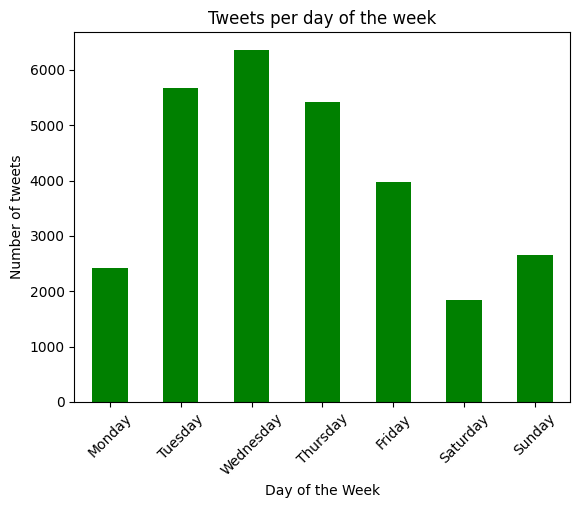

In [91]:
import matplotlib.pyplot as plt

tweets_per_day.plot(kind='bar', color='green')
plt.title('Tweets per day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.show()